In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skmob
from skmob.tessellation import tilers
from skmob.measures.individual import distance_straight_line, maximum_distance, number_of_visits, waiting_times, real_entropy
import math
from tqdm import tqdm
from numpy.linalg import norm
import traja
from scipy.stats import ks_2samp
import folium
from datetime import datetime
from skmob.models.epr import DensityEPR
import geopandas as gpd


/home/ryn/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
dat = pd.read_csv("Minute_Trajectories.csv")
dat['angles'] = traja.trajectory.calc_angle(dat)

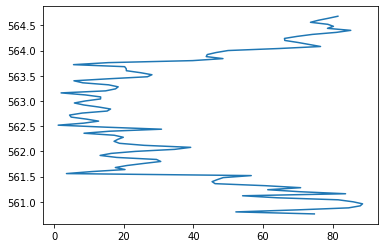

In [3]:
plt.plot(dat['angles'].head(100),dat['t'].head(100))

In [6]:
print(np.min(dat['norm_time']),np.max(dat['t']))

-0.2799999999999727 17473.64


In [5]:
dat['norm_time'] = dat['t']-561

In [7]:
def sample_angle_t(t):
    d_t = dat[np.floor(dat['norm_time'])==t]
    return d_t.sample()['angles']
def sample_len_t(t):
    d_t = dat[np.floor(dat['norm_time'])==t]
    ind = np.random.randint(np.shape(d_t)[1])
    ind1 = np.where(dat['t'] == d_t.iloc[ind]['t'])[0][0]
    if(ind1 > 0):
        d1 = dat.iloc[ind1]
        d2 = dat.iloc[ind1-1]
        d = np.sqrt((d1['x']-d2['x'])**2 + (d1['y']-d2['y'])**2)
    else:
        d = 0
    return d

In [10]:
def sample_rw(n=1500,x=0,y=0, a="unif",l="unif"):
    traj = np.zeros((n,2))
    for i in range(1,n):
        an = sample_angle_t(i)
        ln = sample_len_t(i)
        x1 = traj[i-1][0] + ln * np.cos(an)
        y1 = traj[i-1][1] + ln * np.sin(an)
        traj[i]=[x1,y1]
    return traj
        

In [ ]:
num_samples = 500
total_data = []
for i in tqdm(range(num_samples)):
    traj = sample_rw()
    total_data.append(traj)

plt.plot(traj[:,0],traj[:,1])

  4%|▍         | 20/500 [09:30<3:57:28, 29.68s/it]